In [15]:
#importação e coleta de dados
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

#Pegando os dados da ação
ticker = 'UUUU'
stock_df = yf.download(ticker, start='2015-01-01', end='2025-10-16')

#salvando os dados brutos
stock_df.to_csv(f'../data/raw/{ticker}_raw.csv')

#inspecionando os dados
df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)
print("Primeiros 5 dias dos dados:")
display(df.head())

print("\nÚltimos 5 dias dos dados:")
display(df.tail())

/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_27082/4019124267.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker, start='2015-01-01', end='2025-10-16')
[*********************100%***********************]  1 of 1 completed

Primeiros 5 dias dos dados:



/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_27082/4019124267.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,UUUU,UUUU,UUUU,UUUU,UUUU
Date,NaN,NaN,NaN,NaN,NaN
2015-01-02,6.159999847412109,6.25,6.03000020980835,6.230000019073486,8700
2015-01-05,5.329999923706055,6.079999923706055,5.079999923706055,6.019999980926514,157400
2015-01-06,5.309999942779541,5.5,5.309999942779541,5.389999866485596,114800



Últimos 5 dias dos dados:


,Close,High,Low,Open,Volume
Price,,,,,
2025-10-09,19.700000762939453,20.510000228881836,18.510000228881836,19.0,36665000
2025-10-10,20.34000015258789,22.3700008392334,20.200000762939453,21.239999771118164,46707900
2025-10-13,23.770000457763672,25.690000534057617,22.709999084472656,24.34000015258789,43240500
2025-10-14,26.229999542236328,26.8799991607666,21.899999618530273,26.079999923706055,60650500
2025-10-15,24.989999771118164,27.329999923706055,23.0,26.65999984741211,58895100


In [16]:
# Lista de colunas que deveriam ser numéricas
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']

# Loop para converter cada coluna
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificando as mudanças
print("Tipos de dados após a conversão:")
df.info()

Tipos de dados após a conversão:
<class 'pandas.core.frame.DataFrame'>
Index: 2715 entries, Ticker to 2025-10-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2713 non-null   float64
 1   High    2713 non-null   float64
 2   Low     2713 non-null   float64
 3   Open    2713 non-null   float64
 4   Volume  2713 non-null   float64
dtypes: float64(5)
memory usage: 127.3+ KB


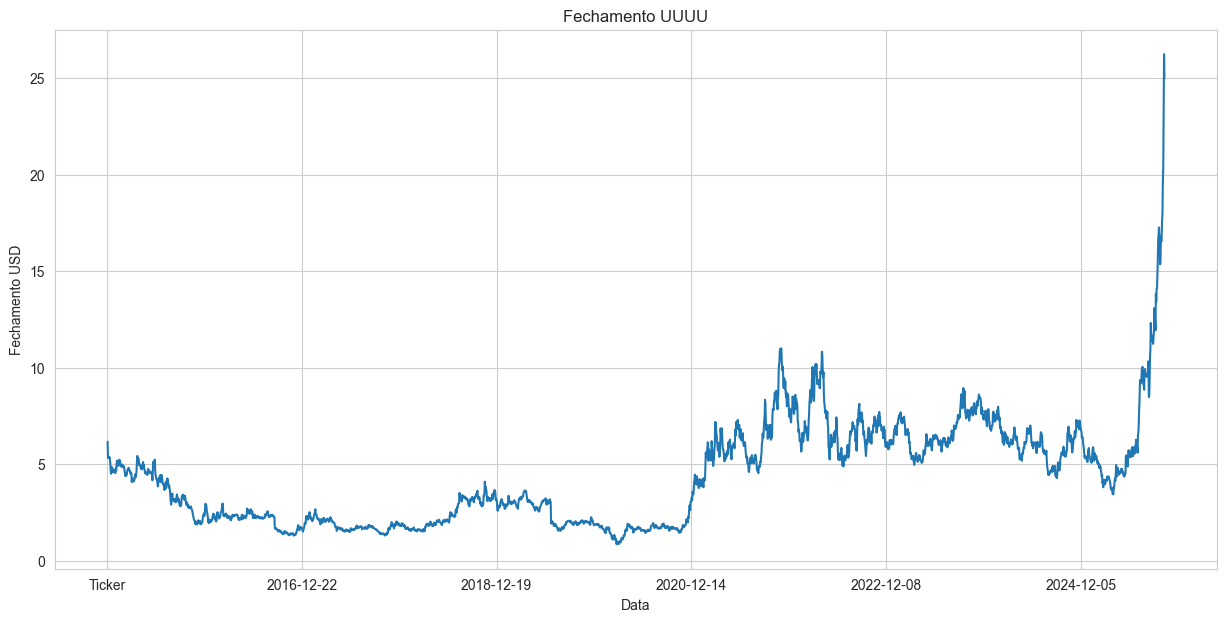

In [17]:
df['Close'].plot()
plt.title("Fechamento UUUU")
plt.xlabel('Data')
plt.ylabel('Fechamento USD')
plt.show()

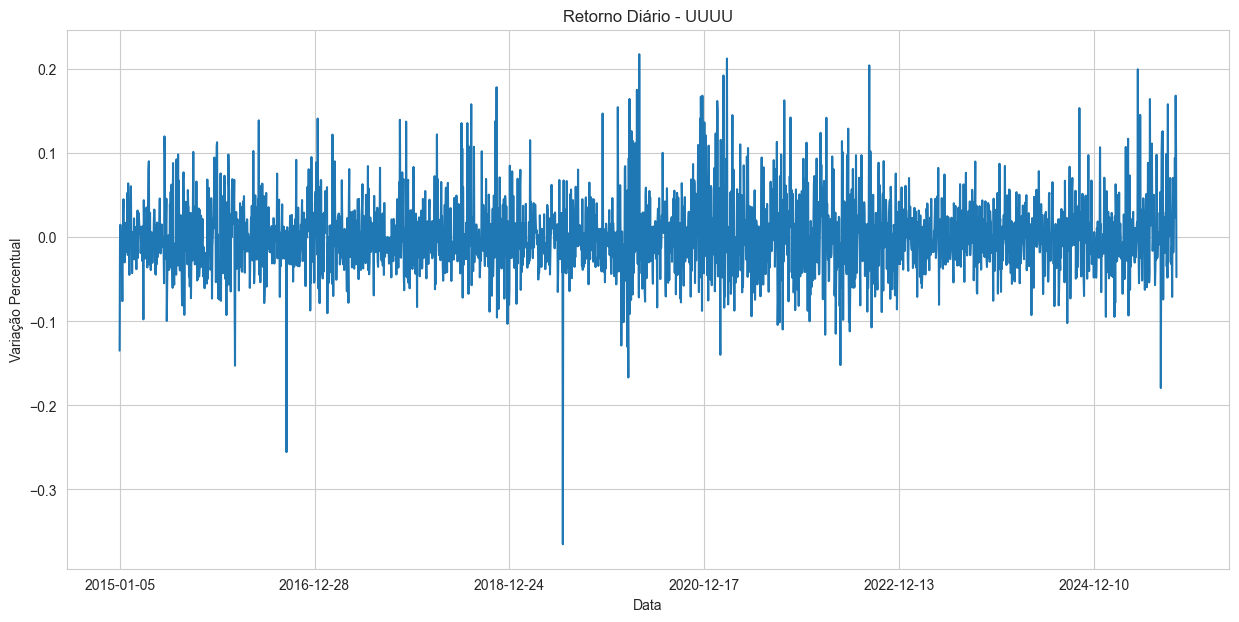

In [18]:
# --- Passagem 1: Calculando o Retorno Diário ---
# O método .pct_change() calcula a variação percentual de um dia para o outro
df['Daily_Return'] = df['Close'].pct_change()

# --- Passagem 2: Removendo o primeiro valor nulo ---
# O primeiro dia não tem retorno, então o resultado é NaN (Not a Number).
# O método .dropna() remove as linhas com valores nulos.
df_returns = df['Daily_Return'].dropna()

# --- Passagem 3: Plotando os Retornos ---
df_returns.plot()

plt.title('Retorno Diário - UUUU')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.show()

In [21]:
# Mostra a contagem de valores nulos (NaN) para cada coluna
print(df.isnull().sum())

df.dropna(inplace=True)

# Verificando se ainda existem valores nulos
print("\nContagem de nulos após o preenchimento:")
print(df.isnull().sum())

Close           2
High            2
Low             2
Open            2
Volume          2
Daily_Return    3
dtype: int64

Contagem de nulos após o preenchimento:
Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
dtype: int64


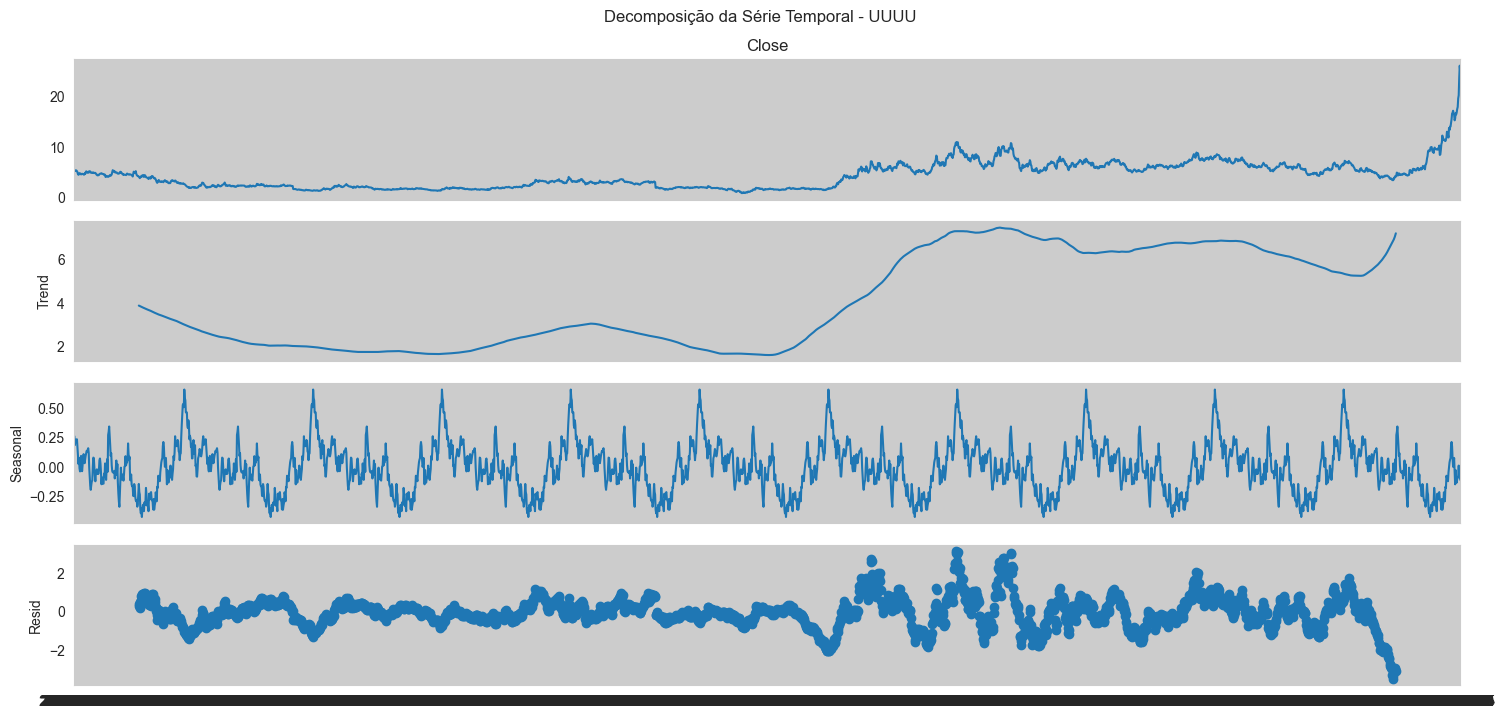

In [22]:
# --- Passagem 1: Importando a ferramenta ---
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Passagem 2: Realizando a decomposição ---
# Vamos decompor a série de preços de Fechamento ('Close')
# 'period=252' assume uma sazonalidade anual (aprox. 252 dias de negociação em um ano)
# 'model='additive'' é a forma mais simples de decomposição
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)

# --- Passagem 3: Plotando os componentes ---
# O objeto 'decomposition' já vem com um método .plot() para facilitar a visualização
fig = decomposition.plot()
plt.suptitle('Decomposição da Série Temporal - UUUU', y=1.02) # Adiciona um título geral
plt.show()